# NYC Green Taxi Trips


***Author: Shilong Li***

To help understand the different kinds of behaviors of the NYC Green Taxi Trips, the main objective of this project is to analyze the NYC green taxi dataset, find underlying patterns, and predict the new trips. Different data science techniques are employed to complete the task. 

- Preliminary Data Exploration: We first jump into the dataset and conduct some inital data analyses which could improve our understanding of the dataset.
- Building Predicitve Models: We want to help cab drivers predict their potential tip percentage after their trips. To this end, we perform the following procedures:
 - Cleaning Data
 - Feature Engineering
 - Exploratory Data Analysis & Feature Selection
 - Constructing Machine Learning Models

In [1]:
# Import necessary packages for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, time, pickle
import datetime as dt
import scipy.stats as stats
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import IPython
from IPython import display

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Preliminary Data Exploration

***Question 1 :*** We will automatically download the [September 2015](https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv) dataset into Pandas and save it into the local disk if no existence there. The dimension of the dataset can be observed.

In [2]:
# Load green taxi trip data of September 2015 into Pandas
if os.path.exists('green_tripdata_2015-09.csv'):
    data = pd.read_csv('green_tripdata_2015-09.csv')
else:
    url = 'https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv'
    data = pd.read_csv(url)
    data.to_csv(url.split('/')[-1], index = False)
    
# Output the number of rows and columns
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  1494926
Number of columns:  21


Since there are only 21 columns in the dataset, the descriptive statistic will be a good way to give some initial insights into the data. For example, the maximum value of the trip distance is 603.1 miles which exceeds our general imagination for a taxi in NYC having this trip distance. 

In [3]:
# We first copy the original dataset to carry out the preliminary analysis
data_explore = data.copy()
# Since there are only 21 columns, the simple descriptive statistics for each column are calculated 
data_explore.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


***Question 2:*** We will first dig into our dataset and investigate one important variable, *trip distance*.

Shape parameter: 0.761029
 Local parameter: -0.155257 
 Scale parameter: 2.184609


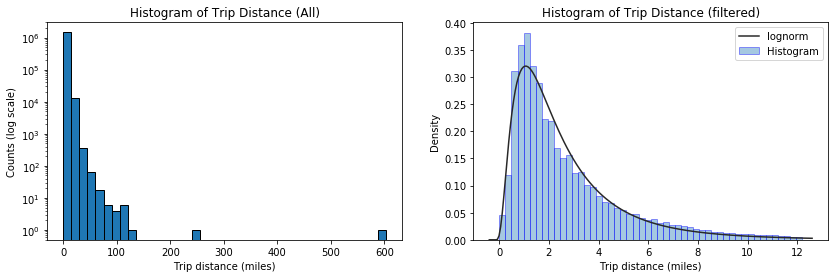

In [4]:
# Set the figure and axes to plot results
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (14, 4))

# plot the original distribution of the Trip Distance
Trip_dist = data_explore.Trip_distance
Trip_dist.hist(bins = 40, ax = ax0, log = True, edgecolor = 'black')
ax0.set_xlabel('Trip distance (miles)')
ax0.set_ylabel('Counts (log scale)')
_ = ax0.set_title('Histogram of Trip Distance (All)')
ax0.grid(False)

# First eliminate the outliers based on te original distribution, and then plot histogram and fitted distribution
Trip_dist_clip = Trip_dist[(Trip_dist > 0) & ((Trip_dist - Trip_dist.mean()).abs() < 3 * Trip_dist.std())]
sns_0 = sns.distplot(Trip_dist_clip, fit = stats.lognorm, kde = False, hist_kws = {'edgecolor':'b'}, ax = ax1)
s, loc, scale = stats.lognorm.fit(Trip_dist_clip, loc = 0, scale = Trip_dist_clip.mean())
ax1.set_xlabel('Trip distance (miles)')
ax1.set_ylabel('Density')
_ =ax1.legend(['lognorm', 'Histogram'], loc = 0)
_ =ax1.set_title('Histogram of Trip Distance (filtered)')
print('Shape parameter: {:f}\n Local parameter: {:f} \n Scale parameter: {:f}'.format(s, loc, scale))

The figure on the left shows the original distribution of the trip distance. The positive skewness can be observed, and some data is located around 600 miles. 
- For the skewness, our intuitive hypothesis is that most NYC taxi trips are short distances, and any negative value for the trip distance is not allowed either. 
- After checking the data around 600 mile, we found that the total amount is only $2.55 which does not make any sense for this distance. Subsequently, we drew the distribution with filtered data, and tried the continuous fit using log normal distribution which displays good fit.

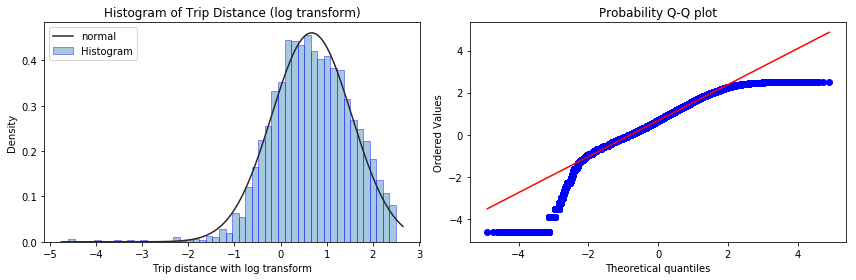

In [5]:
# Transform trip distance using log function to further verify the original lognorm distribution
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (12, 4))
Trip_dist_norm = np.log(Trip_dist_clip)
sns_1 = sns.distplot(Trip_dist_norm, fit = stats.norm, kde = False, hist_kws = {'edgecolor':'b'}, ax = ax0)
ax0.set_xlabel('Trip distance with log transform')
ax0.set_ylabel('Density')
_ = ax0.set_title('Histogram of Trip Distance (log transform)')
ax0.legend(['normal', 'Histogram'], loc = 2)

# Draw the Q-Q plot 
res = stats.probplot(Trip_dist_norm, plot = ax1)
_ = ax1.set_title('Probability Q-Q plot')
plt.tight_layout()

Since the original data is close to the log normal distribution, we transformed the filtered data by log transformation. We might anticipate the normal distribution after the tranformation.
- The figure on the left shows the tranformed distribution and fitted normal distribution, both of which demonstrate the similarity.
- We also drew the Q-Q plot on the right, showing the most of data follow the normal distribution.

***Conclusion: ***
- Most of peopel taking green taxi travelled around 1.5miles, which makes sense because long distance travel with a taxi would cost much more money than taking other transportation, like bus and metro. But it can be convenient and save time for the short distance.

***Question 3:*** we will find whether there exist certain relations between trip distances and daily hours

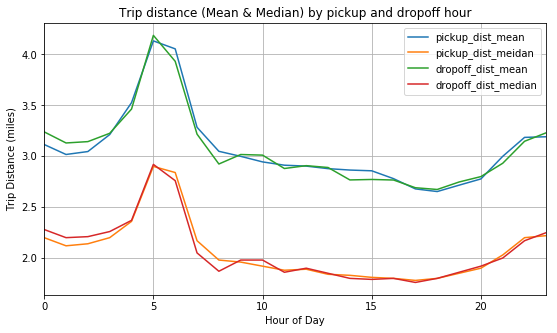

In [6]:
# Transform the time objects into datetime format
data_explore.rename(columns = {'lpep_pickup_datetime': 'Pickup_datetime', 'Lpep_dropoff_datetime': 'Dropoff_datetime'},\
                    inplace = True)
data_explore['Pickup_datetime'] = pd.to_datetime(data_explore.Pickup_datetime)
data_explore['Dropoff_datetime'] = pd.to_datetime(data_explore.Dropoff_datetime)

# Extract the pickup and dropoff hours
data_explore['Pickup_hour'] = data_explore['Pickup_datetime'].dt.hour
data_explore['Dropoff_hour'] = data_explore['Dropoff_datetime'].dt.hour

# Calculate the mean and median for the trip distance grouped by the pickup and dropoff hours, respectively
table_pickup = data_explore.groupby('Pickup_hour')['Trip_distance'].agg([np.mean, np.median])\
               .rename(columns = {'mean':'pickup_dist_mean', 'median':'pickup_dist_meidan'})
table_dropoff = data_explore.groupby('Dropoff_hour')['Trip_distance'].agg([np.mean, np.median])\
               .rename(columns = {'mean': 'dropoff_dist_mean', 'median': 'dropoff_dist_median'})

# Obtain the table containing trip distance metrics based on both pickup and dropoff hours
table = pd.concat([table_pickup, table_dropoff], axis = 1)
table.index.name = 'Hour'

# Visualization for trip distance mean and median 
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
table.plot(ax = ax, grid = True )
ax.set_title("Trip distance (Mean & Median) by pickup and dropoff hour")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Trip Distance (miles)")
xlim = ax.set_xlim((0, 23))

- The trip distances grouped by both pickup and dropoff hours have the similar trends. My hypothesis is that most of the trips are ended within an hour so that pickup and dropoff time may be in the same observation.
- The median value is always lower than mean value. There might be some long distance travels to cause this phenonmenon.
- We can see that the peak range occurs during 4:00am-7:00am when people rush to work by taking taxi. The short distance range locates around 4:00pm. My guess is that peope may take taxi to nearby places, like restaurants. 

We will look at the ***airport trips***, as people like taking cabs to airports for convenience. Our first task would be to distinguish airport trips from non-aiport trips. After searching on the NYC Taxi and Limousine Commission website, the [Data Dictionary](http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf) was found which contains valuable information, specifically, the descriptions for each column.  The RateCodeID attracted my attention as it shows the location information at the end of each trip, in which RateCodeID=2 represents JFK trip and RateCodeID=3 signifies Newark ariport trip. This information is explicitly used here to identify the airport trips.

In [7]:
# Seperate the JFK and Newark trips from other trips 
airport_JFK = data_explore[data_explore.RateCodeID == 2]
airport_Newark = data_explore[data_explore.RateCodeID == 3]
non_airport = data_explore[(data_explore.RateCodeID != 2) & (data_explore.RateCodeID != 3)]
print("Number of JFK trips: {:d}, and Newark trips: {:d}".format(airport_JFK.shape[0], airport_Newark.shape[0]))
print("Average fare amount for each trip to JFK: ${:f}, and to Newark: ${:f}"\
      .format(airport_JFK.Fare_amount.mean(),airport_Newark.Fare_amount.mean()))
print("Average total amount for each trip to JFK: ${:f}, and to Newark: ${:f}"\
      .format(airport_JFK.Total_amount.mean(),airport_Newark.Total_amount.mean()))

Number of JFK trips: 4435, and Newark trips: 1117
Average fare amount for each trip to JFK: $49.021871, and to Newark: $48.798568
Average total amount for each trip to JFK: $56.531709, and to Newark: $59.895273


We can see the fare amounts for both airport trips are very similar.

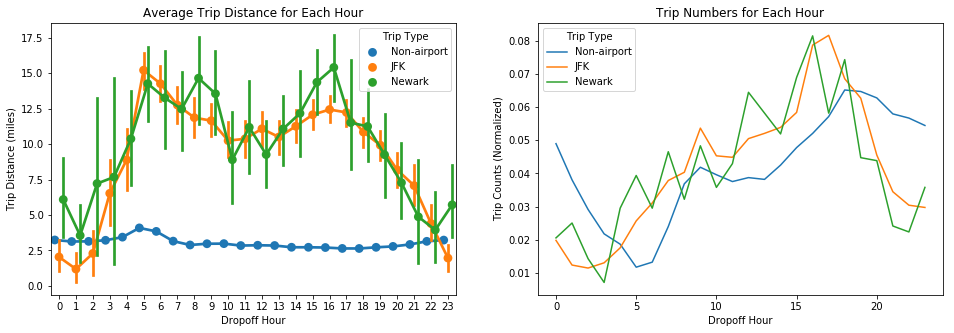

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (16, 5))

# Compare the trip distances among JFK, Newark and nonairport trips
data_explore.loc[(data_explore.RateCodeID != 2) & (data_explore.RateCodeID != 3), 'RateCodeID'] = 1
_ = sns.pointplot(x = 'Dropoff_hour', y = 'Trip_distance', hue = 'RateCodeID', data = data_explore,dodge = .5, ax = ax0)
ax0.set_xlabel("Dropoff Hour")
ax0.set_ylabel('Trip Distance (miles)')
ax0.set_title("Average Trip Distance for Each Hour")
leg_handles = ax0.get_legend_handles_labels()[0]
_ = ax0.legend(leg_handles, ['Non-airport', 'JFK', 'Newark'], title = 'Trip Type')

# Compare the numbers of airport trip and nonairport trip
non_airport.Dropoff_hour.value_counts(normalize = True).sort_index().plot(ax = ax1)
airport_JFK.Dropoff_hour.value_counts(normalize = True).sort_index().plot(ax = ax1)
airport_Newark.Dropoff_hour.value_counts(normalize = True).sort_index().plot(ax = ax1)
ax1.set_xlabel('Dropoff Hour')
ax1.set_ylabel("Trip Counts (Normalized)")
ax1.set_title("Trip Numbers for Each Hour")
_ = ax1.legend(['Non-airport', 'JFK', 'Newark'], title = 'Trip Type')

From left figure, we can observe that:
- The peak trip distances for airport travels appear at 5:00am in the morning and 4:00pm at afternoon, and between the two time points, the average trip distances are still large (more than 10 miles). My hypothes is that departure and arrival air flights are mainly centered in this time range. I'd like to analyze air flights information if more time is allowed.
- The deviations for Newark trips are larger than the JFK trips. The hypothesis will be that some people living at more eastern areas like long island will travel longer to Newark than JFK, and JFK is located at near center longitude location of NYC area.
- The average trip distances for the non-airport trips tend to be horizontal with respect to dropoff hours, and the deviations are quite small. It makes sense because most non-airport trips are for commute within or between boroughs.

From fight figure, we can observe that:
- Most people travel to the two ariports around 4:00pm while the peak of non-airport trips is found around 6:00pm.
- The lowest rate of trips to either airports or non-airports is in the morning before 5:00am. 

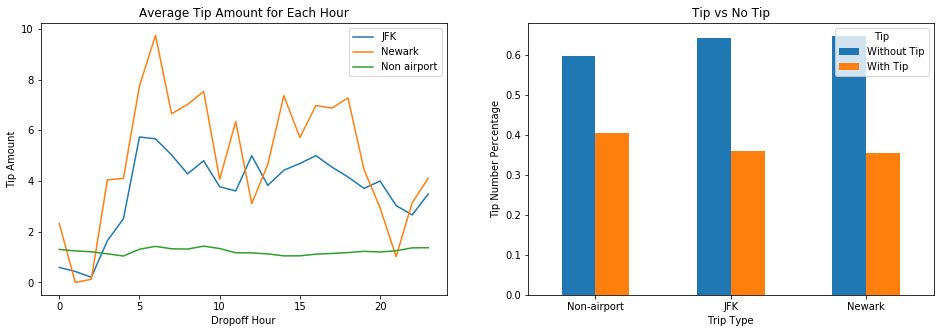

In [9]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (16, 5))

# Plot the tip amount for airport and non-airport trips in terms of each hour
airport_JFK.groupby('Dropoff_hour')['Tip_amount'].agg(np.mean).plot(ax = ax0, label = 'JFK')
airport_Newark.groupby('Dropoff_hour')['Tip_amount'].agg(np.mean).plot(ax = ax0, label = 'Newark')
non_airport.groupby('Dropoff_hour')['Tip_amount'].agg(np.mean).plot(ax = ax0, label = 'Non airport')
ax0.legend()
ax0.set_xlabel('Dropoff Hour')
ax0.set_ylabel('Tip Amount')
ax0.set_title('Average Tip Amount for Each Hour')

# Compare occurrence rate of tip for the three trip groups
data_explore['With_tip'] = 1*(data_explore.Tip_amount > 0)
data_temp = data_explore.groupby('RateCodeID').With_tip.value_counts(normalize = True)
_ = data_temp.reset_index(name = 'vlaues').pivot(index = 'RateCodeID', columns = 'With_tip')\
.rename({1:'Non-airport', 2:'JFK', 3:'Newark'}).plot.bar(rot = 0, ax = ax1)
ax1.set_xlabel('Trip Type')
ax1.set_ylabel('Tip Number Percentage')
ax1.set_title("Tip vs No Tip")
_= ax1.legend(['Without Tip', 'With Tip'], title = 'Tip')

People taking cabs to airports would pay more tips than non-ariport trips since most of trip distances to the airports are much longer than non-airport trips. We can not tell the differences about the tip occurrence rates among these three groups even if the airport trips have longer distances.

## Predictive Model

### 1. Missing values and abnormal coordinates
We first detect the missing values in the dataset. Since coordinate values exist in the dataset, we can examine if they are reasonable.

In [10]:
# examine if there are missing values in the dataset
def missing_values_table(df):
    """Detect the missing values in the dataset.
    Args:
       df(DataFrame): DataFrame to be detected
    Returns:
       Missing percentage table"""
    
    mis_va = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_va, mis_val_percent], axis = 1)
    mis_val_table = mis_val_table.rename(columns = {0:'Missing Values', 1:'% of Total Values'})
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending = False)
    print("The selected dataframe has {} columns. There are {} columns having missing values"\
         .format(df.shape[1],mis_val_table.shape[0]))
    return mis_val_table

print(missing_values_table(data))

The selected dataframe has 21 columns. There are 2 columns having missing values
            Missing Values  % of Total Values
Ehail_fee          1494926         100.000000
Trip_type                4           0.000268


The Ehail_fee column has 100% missing values so that we will delete this variable. Trip_type only has 4 missing values for which we can drop or impute.

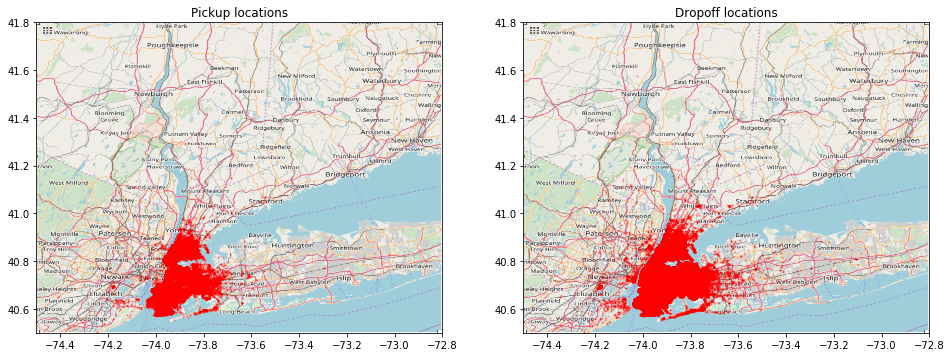

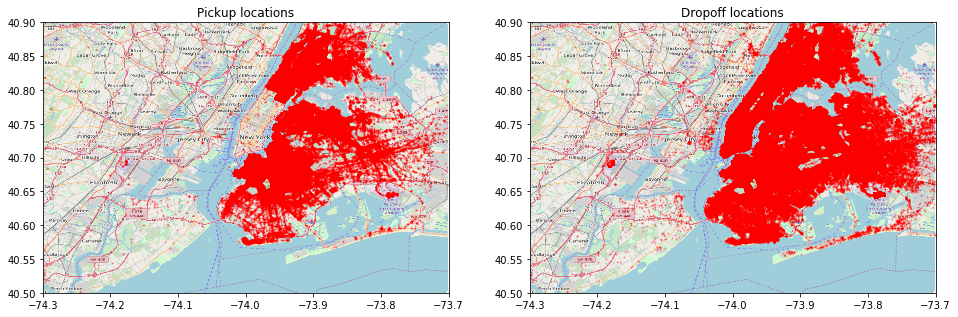

In [11]:
# This function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    """Plot coordinates on the NYC map to identify abnormal points
    Args:
       df(DataFrame): DataFrame contain coordinates information
       BB(tuple or list): Bounding box of coordinates
       nyc_map(image file): NYC map
       s(int): Point width
       alpha(float): Transparency degree
    Returns:
       No returns. Plot coordiantes on the map"""
    
    fig, axs = plt.subplots(1, 2, figsize=(16,8))
    axs[0].scatter(df.Pickup_longitude, df.Pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.Dropoff_longitude, df.Dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

# Define the NYC coordinates    
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')
plot_on_map(data, BB, nyc_map, s = 1, alpha = 0.3)

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')
plot_on_map(data, BB_zoom, nyc_map_zoom, s = 1, alpha = 0.3)

We did not find any coordinates located in the water from both pickup and dropoff locations in both big and zoom-in maps. But we indeed noticed that some coordinates are zeros in the EDA analysis which should be dropped or imputed.

### 2. Cleaning Data
Clearning data is an iterative process when we conduct the exploratory data analysis. Therefore, the codes for cleaning data in this section would be added or modified after we identify some abrnomal values in the process of EDA.

In [12]:
# Delete Ehail_fee column since 100% of values are missing
if 'Ehail_fee' in data.columns:
    data.drop('Ehail_fee', axis = 1, inplace = True)

# As the Trip_type only has four missing values, we can either delete correspoding observations or impute them.
# Here, we choose dropping the four observations 
data.drop(data[data['Trip_type '].isna()].index, axis = 0, inplace = True)
data.reset_index(drop = True, inplace = True)

# Transfer the time columns into datetime format
data.rename(columns = {'lpep_pickup_datetime': 'Pickup_datetime', 'Lpep_dropoff_datetime': 'Dropoff_datetime'},\
            inplace = True)
data['Pickup_datetime'] = pd.to_datetime(data.Pickup_datetime)
data['Dropoff_datetime'] = pd.to_datetime(data.Dropoff_datetime)

# The features associated with money should not be negative
print("Fare_amount has {}% negative values".format(100*data[data.Fare_amount < 0].shape[0] / len(data)))
data.Fare_amount = data.Fare_amount.abs()
print("Tip_amount has {}% negative values".format(100*data[data.Tip_amount < 0].shape[0] / len(data)))
data.Tip_amount = data.Tip_amount.abs()
print("Tolls_amount has {}% negative values".format(100*data[data.Tolls_amount < 0].shape[0] / len(data)))
data.Tolls_amount = data.Tolls_amount.abs()
print("Total_amount has {}% negative values".format(100*data[data.Total_amount < 0].shape[0] / len(data)))
data.Total_amount = data.Total_amount.abs()

# Extra, MTA_tax, and Improvement_surcharge are imputed with most frequent values
invalid_extra = data[~((data.Extra == 0) | (data.Extra == .5) | (data.Extra == 1.0))].index
print("{}% of values in Extra are not valid".format(100*len(invalid_extra) / len(data)))
data.loc[invalid_extra, 'Extra'] = 0
invalid_MTA_tax = data[~((data.MTA_tax == 0) | (data.MTA_tax == .5))].index
print("{}% of values in MTA_tax are not valid".format(100*len(invalid_MTA_tax) / len(data)))
data.loc[invalid_MTA_tax, 'MTA_tax'] = 0.5
invalid_impro_surch = data[~((data.improvement_surcharge == 0) | (data.improvement_surcharge == .3))].index
print("{}% of values in improvement_surcharge are not valid".format(100*len(invalid_impro_surch) / len(data)))
data.loc[invalid_impro_surch, 'improvement_surcharge'] = 0.3

# Impute RateCodeID with most frequent values
invalid_ratecodeid = data[~((data.RateCodeID >= 1) & (data.RateCodeID <=6))].index
print("{}% of values in RateCodeID are not valid".format(100*len(invalid_ratecodeid) / len(data)))
data.loc[invalid_ratecodeid, 'RateCodeID'] = 1

# Total_amount can not be less than $2.5
invalid_amount = data[data.Total_amount < 2.5].index
print("{}% of values in Total_amount are not valid".format(100*len(invalid_amount) / len(data)))
data.loc[invalid_amount, 'Total_amount'] = data[data.Total_amount >=2.5].Total_amount.mean()

# Encode Store_and_fwd_flag into numeric type
data['Store_and_fwd_flag'] = 1*(data.Store_and_fwd_flag == 'Y')

# Clear abnormal longitude and latitude coordinates
coord_invalid = data[((data.Pickup_longitude == 0) | (data.Pickup_latitude == 0)\
              | (data.Dropoff_longitude == 0) | (data.Dropoff_latitude == 0))]
print("{} number of abnormal coordinates".format(coord_invalid.shape[0]))
data = data[~((data.Pickup_longitude == 0) | (data.Pickup_latitude == 0)\
              | (data.Dropoff_longitude == 0) | (data.Dropoff_latitude == 0))]

Fare_amount has 0.16168067631622252% negative values
Tip_amount has 0.002541938642952609% negative values
Tolls_amount has 0.00046825185528074373% negative values
Total_amount has 0.16168067631622252% negative values
0.08428533395053388% of values in Extra are not valid
0.14629525821414094% of values in MTA_tax are not valid
0.14816826563526392% of values in improvement_surcharge are not valid
0.0001337862443659268% of values in RateCodeID are not valid
0.31834436846872277% of values in Total_amount are not valid
3545 number of abnormal coordinates


- We delete the Ehail_free variable, and drop the Trip_type missing observations.
- The datetime columns (lpep_pickup_datetime and Lpep_dropoff_datetime) are transformed into the corrent datetime formats.
- Columns with negative values (Fare_amount, Tip_amount, Tolls_amount and Total_amount) are converted into positive values.
- Invalid values in Extra, MTA_tax improvement_surcharge, RateCodeID and Total_amount are imputed.
- Delete coordinates with zero values.

### 3. Target Varibles
The variable tip percentage is established which will be treated as the target varible for our model to predict. We also build another varible, With_tip, as the binary one to mark whether a trip is tipped or not. We first analyze this two variables to find some useful information.

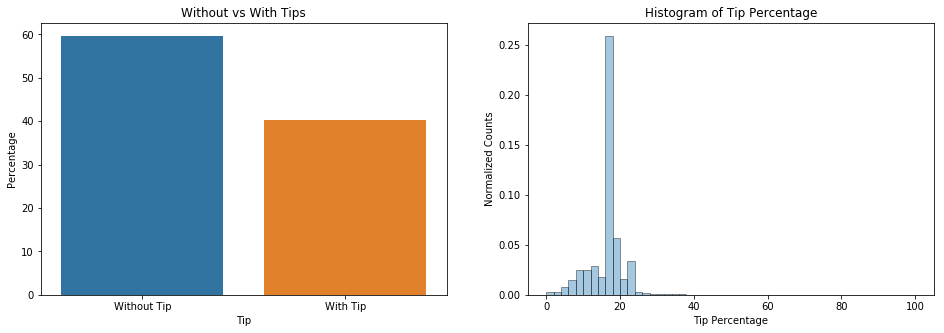

In [13]:
# Construct the Tip_percentage and With_tip variables
data['Tip_percentage'] = 100 * data.Tip_amount / data.Total_amount
data['With_tip'] = 1*(data.Tip_amount > 0)

# Explore the percentages for trip with and without tips
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (16, 5))
_ = sns.barplot(x = 'With_tip',y = 'With_tip', data = data, estimator = (lambda x: len(x) / len(data) * 100), ax = ax0)
a = ax0.get_xticks().tolist()
a = ['Without Tip', 'With Tip']
ax0.set_xticklabels(a)
ax0.set_xlabel("Tip")
ax0.set_ylabel('Percentage')
_ = ax0.set_title('Without vs With Tips')

# Show the distribution of the Tip_percentage
_ = sns.distplot(data[data.With_tip == 1].Tip_percentage, kde = False, ax = ax1, 
                 hist_kws = {'edgecolor': 'black'}, norm_hist = True)
ax1.set_xlabel('Tip Percentage')
ax1.set_ylabel('Normalized Counts')
_ = ax1.set_title('Histogram of Tip Percentage')

- About 60% trips, people are not willing to pay the tips, and the data distribution is still under balance data condition.
- From the tip percentage distribution, we can see that more percentages are 18%-20% which are normal tip percentages based on everyone's life experience.

***These two variables were considered as the targets (with_tip for an classification task and Tip_percentage as a regression problem) to predict at the beginning of building the model. However, the fact that Tips are made only when credit card is used based on the [Data Dictionary](http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf) leads us to only consider regression with Tip_percentage as target.***

### 4. Featureing Engineering
Feature Engineering is the essential part for the data science to extract relational information from existing data which helps the machine learning models to recognize the underlying patterns in the provided dataset. In this section, we will try different strategies based on our dataset at hand.
- Principal Component Analysis is utilized to rotate our coordinates according to the variances of our coordinate data.
- The bearing direction for each trip is calculated as different directions the customers head may affect the tip percentage given the customers.
- Different datetime features are built, which may be helpful to group some other varibles.
- The average speed for each trip is determined, and is grouped by other varibles.
- The clustering algorithm is employed to define various coorelated clusters. People from different clusters may tend to be more generous to tip the drivers.
- Different groups constructed by different variables may provide insights into the patterns in our data.


***4.1. Principal Component Analysis***

We use the [PCA algorithm](https://en.wikipedia.org/wiki/Principal_component_analysis) to rotate the coordinates since PCA gives us the directions based on the degrees of variances, which may help the training in some models, such as tree-based models. From the results plotted in the following figures, the rotations of the coordinates can be clearly seen.

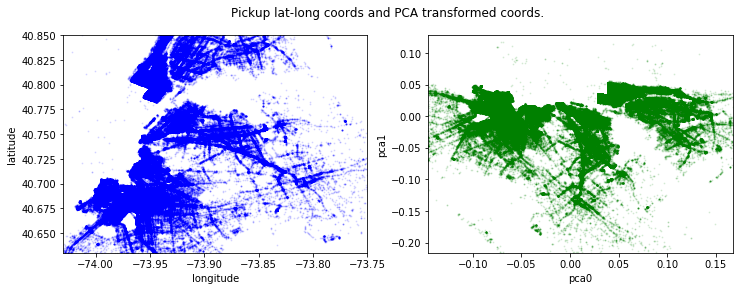

In [14]:
# concatenate the coordinate and transfrom the coordinates
coords = np.vstack((data[['Pickup_latitude', 'Pickup_longitude']].values,
                    data[['Dropoff_latitude', 'Dropoff_longitude']].values))
pca = PCA().fit(coords)
data['Pickup_pca0'] = pca.transform(data[['Pickup_latitude', 'Pickup_longitude']])[:,0]
data['Pickup_pca1'] = pca.transform(data[['Pickup_latitude', 'Pickup_longitude']])[:,1]
data['Dropoff_pca0'] = pca.transform(data[['Dropoff_latitude', 'Dropoff_longitude']])[:,0]
data['Dropoff_pca1'] = pca.transform(data[['Dropoff_latitude', 'Dropoff_longitude']])[:,1]

# plot the original coordinates and transformed ones
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
N = 1000000
ax[0].scatter(data['Pickup_longitude'].values[:N], data['Pickup_latitude'].values[:N],
              color='blue', s=1, alpha=0.1)
ax[1].scatter(data['Pickup_pca0'].values[:N], data['Pickup_pca1'].values[:N],
              color='green', s=1, alpha=0.1)
fig.suptitle('Pickup lat-long coords and PCA transformed coords.')
ax[0].set_ylabel('latitude') 
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('pca0')
ax[1].set_ylabel('pca1')
ax[0].set_xlim(city_long_border)
ax[0].set_ylim(city_lat_border)
# Also transform the bounding box
pca_borders = pca.transform([[x, y] for x in city_lat_border for y in city_long_border])
ax[1].set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())
ax[1].set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())
plt.show()

***4.2. Bearing Direction***

The [bearing direction](https://www.igismap.com/formula-to-find-bearing-or-heading-angle-between-two-points-latitude-longitude/) of the trip may also provide some useful information under the assumption that in certain directions customers may be willing to give tips and may different amounts. The bearing direction is determined based on [classical formula](https://www.igismap.com/formula-to-find-bearing-or-heading-angle-between-two-points-latitude-longitude/) using longitude and latitude coordinates. 

In [15]:
def bearing_direction(lat1, lng1, lat2, lng2):
    """ Calculate the bearing direction provided with the longitude and latitude coordinates of two place points
    Args: 
        lat1(float): latitude of location 1
        lng1(float): longitude of location 1
        lat2(float): latitude of location 2
        lng2(float): longitude of location 2
    Return:
        DataFrame containing "Direction" variable"""
    
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

data['Direction'] = bearing_direction(data['Pickup_latitude'].values, data['Pickup_longitude'].values, 
                                     data['Dropoff_latitude'].values, data['Dropoff_longitude'].values) 

***4.3. Datetime Feature***

We construct variables in terms of week, weekday, day, hour and minute, which is a quite [classical method](https://datascience.stackexchange.com/questions/2368/machine-learning-features-engineering-from-date-time-data) to process time features in data science community. The trip duration is another feature derived from original datetime values.

In [16]:
# Derive Pickup week, weekday, day, hour and minute features
data['Pickup_week'] = data['Pickup_datetime'].dt.weekofyear - data['Pickup_datetime'].dt.weekofyear.min() + 1
data['Pickup_weekday'] = data['Pickup_datetime'].dt.weekday
data['Pickup_day'] = data['Pickup_datetime'].dt.day
data['Pickup_hour'] = data['Pickup_datetime'].dt.hour
data['Pickup_minute'] = data['Pickup_datetime'].dt.minute

# Define trip duration
data['Trip_duration'] = (data.Dropoff_datetime - data.Pickup_datetime).dt.total_seconds() / 60

***4.4. Speed***

The average speed is derived from the trip distance and trip duration. We found some NaNs in the derived average speed variable because of small trip duration values. Here, we impute the NaNs and also the average speeds greater than 200mph (unrealistic for speed bigger than 200mph) with samples from an normal distribution. 

In [17]:
# Calculate the average speed for each trip
# Impute the NaNs and avg_speed greater than 200mph with values from an random normal distribtion 
data['Avg_speed'] = data.Trip_distance / (data.Trip_duration / 60)
indice_speed = data[(data.Avg_speed.isnull()) | (data.Avg_speed > 200)].index
loc, scale = data.loc[~data.index.isin(indice_speed), 'Avg_speed'].mean(), \
             data.loc[~data.index.isin(indice_speed), 'Avg_speed'].std()
data.loc[indice_speed, 'Avg_speed'] = np.abs(np.random.normal(loc, scale, size = len(indice_speed)))


***4.5. Clustering***

In this project, we choose using the clustering algorithm ([k-Means](https://en.wikipedia.org/wiki/K-means_clustering)) to divide the associated NYC area into different clusters that could help group different trips to improve the data pattern recognition. To speed the computation, the original data are sampled with specific number. The clustering figure below shows us different groups using this method.

***Another way to analyze the geospatial data would use the [GeoPandas](http://geopandas.org/index.html) to segment the areas and build the connections among areas.  If I have more time, I would like to try the GeoPandas.***

Text(0,0.5,'Latitude')

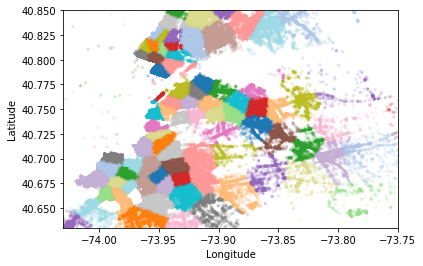

In [18]:
# Sample the original dataset and determine different clusters for pickup and dropoff
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters = 100, batch_size = 10000).fit(coords[sample_ind])
data['Pickup_cluster'] = kmeans.predict(data[['Pickup_latitude', 'Pickup_longitude']])
data['Dropoff_cluster'] = kmeans.predict(data[['Dropoff_latitude', 'Dropoff_longitude']])

# Plot the clusters
fig, ax = plt.subplots()
ax.scatter(data.Pickup_longitude.values[:N], data.Pickup_latitude.values[:N], s = 10, lw = 0,
          c = data.Pickup_cluster.values[:N], cmap = 'tab20', alpha = 0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

***4.6. Group by Hour and Clusters***

We build new variables through grouping average speed with pickup hour, pickup cluster, and dropoff cluster. Doing this may reveal some pattern for predicting target variable.

In [19]:
for gby_col in ['Pickup_hour', 'Pickup_cluster', 'Dropoff_cluster']:
    gby = data.groupby(gby_col).mean()[['Avg_speed']]
    gby.columns = ["{:s}_gby_{:s}".format(gby.columns[0], gby_col)]
    data = pd.merge(data, gby, how = 'left', left_on = gby_col, right_index = True)

## 5. Exploratory Data Analysis

As we only take into account the regression problem with Tip_percentage as target variable, we mainly analyze the relations of our features with target variable, *Tip_percentage*, and also correlations among features.

- Some helper functions are built to facilitate plotting and statistical testing.
- The relations of the features with target variable are analyzed to select some useful features.

In [20]:
# Divide the dataset into two seperate ones based on the condition of tip
data_tip = data[data.With_tip == 1]
data_no_tip = data[~(data.With_tip == 1)]

In [21]:
# Helper functions to make plots and do some statistial testing
# Plot the pearson correlation coefficients
def correlation_heatmap(df, features, method = 'pearson', k = 8):
    """The function is used to calculate the pearson and spearman coefficients with provided features
    Args:
        df(DataFrame): DataFrame containing data to calculate correlation coefficients
        features(list): feature list to be used
        method(str): calculate pearson or spearman coefficients (default: pearson)
        k(int): choose the top k coefficients (default; 8)
    Return:
        No return values. Plot the heat map"""
    
    cols = df[features].corr(method = method).abs().nlargest(k, 'Tip_percentage')['Tip_percentage'].index
    cm = df[cols].corr(method = method)
    _, ax = plt.subplots(figsize = (10,8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(cm, cmap = colormap, square = True, cbar_kws = {'shrink': .9}, 
                    ax = ax, annot = True, linewidths = .1, vmax = 1.0, linecolor = 'white', annot_kws = {'fontsize': 8})
    plt.title('{} Correlation of Features'.format(method.capitalize()), y = 1.05, size = 15)      

# Calculate the one way ANOVA p-values    
def statistic_test(df, features, target):
    """ Conduct the One-way ANOVA or T-test depending on how many categories the feature has.
    Args:
        df(DataFrame): DataFrame providing data
        features(list): feature list to be used
        target(str): target column to do statistical test
    Return:
        anova(DataFrame): DataFrame containing ANOVA pvalues
        ttest(DataFrame): DataFrame with T-test pvalues"""
    
    anova = pd.DataFrame()
    ttest = pd.DataFrame()
    anova['feature'] = [feature for feature in features if df[feature].nunique() > 2]
    ttest['feature'] = [feature for feature in features if df[feature].nunique() == 2]
    pvals_anova = []
    pvals_ttest = []
    for c in features:
        samples = []
        for cls in df[c].unique():
            s = df[df[c] == cls][target].values
            samples.append(s)
        if len(samples) > 2:
            pval = stats.f_oneway(*samples)[1]
            pvals_anova.append(pval)
        else:
            pval = stats.ttest_ind(*samples)[1]
            pvals_ttest.append(pval)
    anova['pval'] = pvals_anova
    ttest['pval'] = pvals_ttest
    return anova.sort_values('pval'), ttest.sort_values('pval')

def plot_numeric(df, feature, target, kde = False, figure_type = 'histogram', xlim = None):
    """Plot the distribution of numeric variable (histogram or violin) and its relation with target variable.
    Args:
        df(DataFrame): DataFrame containing data to plot
        feature(str): feature column
        target(str): target column
        kde(boolen): add kde plot or not (default: False)
        figure_type(str): the figure type to be plotted (default: histogram)
        xlim(list): set the x limit to display (default: None)
    Returns:
        No returns. Plot the corresponding figures"""
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (14, 4))
    
    if figure_type == 'histogram':
        _ = sns.distplot(df[feature], kde = kde, hist_kws = {'edgecolor': 'black'}, ax = ax0)
    elif figure_type == 'violin':
        _ = sns.violinplot(y = feature, data = df, ax = ax0)
    else:
        pass
    
    ax0.set_title("Distribution of {:s}".format(feature)) 
    ax0.set_xlabel(feature)
    
    df.plot.scatter(feature, target, alpha = 0.3, ax = ax1)
    ax1.set_title(target + ' related to ' + feature)
    ax1.set_xlabel(feature)
    ax1.set_ylabel(target)
    ax1.set_xlim(xlim)

def plot_category(df, feature, target, figure_type = 'boxplot', ylim = None):
    """Plot the target values in terms of the categories. Three kinds of plots are provided, boxplot, stripplot and
       histogram based on the feature provided.
    Args:
       df(DataFrame): DataFrame providing data to plot
       feature(str): feature column
       target(str): target column
       figure_type(str): figure type (default: boxplot)
       ylim(list): y axis limit (default None)
    Returns
       No returns. Plot the corresponding figures."""
    
    if figure_type == 'boxplot':
        fig, ax = plt.subplots(1, 1, figsize = (7, 4))
        _ = sns.boxplot(x = feature, y = target, data = df, ax = ax)
        if ylim != None:
            ax.set_ylim(ylim)
        
    elif figure_type == 'strip':
        fig, ax = plt.subplots(1, 1, figsize = (7, 4))
        a_ = sns.stripplot(x = feature, y = target, data = df, size = 3, color = ".25")
    
    elif figure_type == 'histogram':
        categories = sorted(df[feature].unique())
        colors = plt.cm.brg(np.linspace(0,1,len(categories)))
        hx = np.array(list(map(lambda x:round(x,1),np.histogram(df[target], bins=30)[1])))
        fig, ax = plt.subplots(1,1,figsize = (10,4))
        for i, cat in enumerate(categories):
            vals = df[df[feature] == cat][target]
            h = np.histogram(vals, bins = hx)
            w = 0.9*(hx[1]-hx[0])/float(len(categories))
            plt.bar(hx[:-1]+w*i, h[0], color=colors[i], width=w)
        plt.legend(categories)
        plt.yscale('log')
        plt.title('Histogram of Tip Percentage Divided by '+ feature)
        plt.xlabel('Tip Percentage')
    else:
        pass     
    
    print("Ratio of each category (%): \n {} \n".format(df[feature].value_counts(normalize = True) * 100))

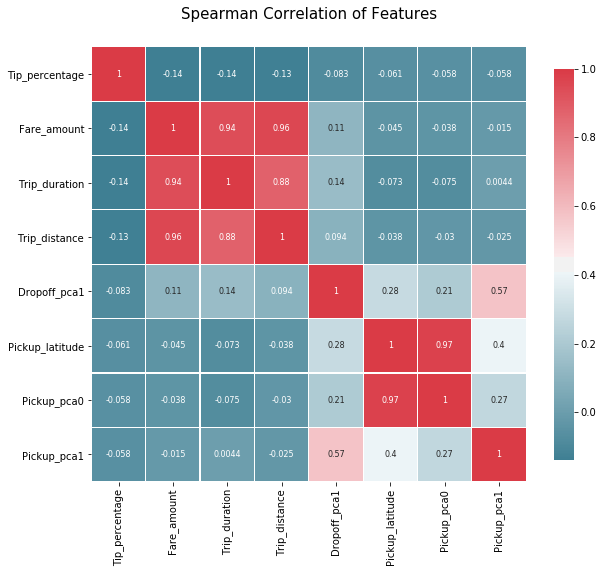

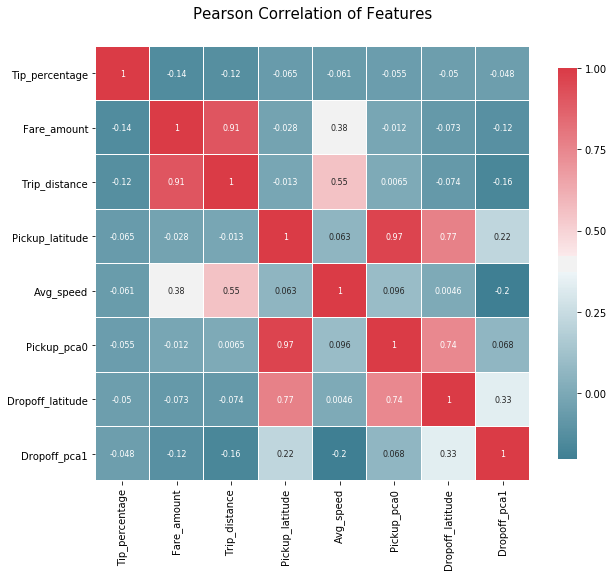

In [22]:
# Analyze the correlations among features, and between features and target variable (tip percentage)
quantitative_features = ['Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
                         'Trip_distance','Fare_amount', 'Tolls_amount', 'Pickup_pca0', 'Pickup_pca1',
                         'Dropoff_pca0','Dropoff_pca1','Trip_duration', 'Avg_speed', 'Tip_percentage']

correlation_heatmap(data_tip, quantitative_features, 'spearman')
correlation_heatmap(data_tip, quantitative_features)

The Spearman and Pearson correlation coefficients are calculated, and top 8 features according to coefficents with respect to Tip_percentage are chosen and the corresponding heat map is plotted to help us intuitively discern values of coefficients. The Pearson coefficients mainly reveal the linear relationship while the Spearman coefficients may offer some insights on the nonlinear relations. 
- From the two heat maps above, we can see that all the correlation coefficients in terms of the Tip_percentage are quite small (the strongest one is -0.14, which is quite small).
- The top features selected by Pearson coefficients are Fare_amount, Trip_duration, Trip_distance,Dropoff_pca1, Pickup_latitue, Pickup_pc0, Pickup_pca1
- The top features picked by Spearman coefficients are Fare_amount, Trip_distance, Pickup_latitude, Avg_speed, Pickup_pca0, Dropoff_latitude and Dropoff_pca1
- We can also realize that some features have high relation coefficients, for instance, Trip_distance and Fare_amount, which can be understood intuitively. We may only choose one of the features with high correlated coefficient.

In [23]:
# Conduct statical testing for categorical features, specifically, ANOVA testing for features more than two categories,
# T-test for features with only two categories
stat_test_features = ['VendorID','Store_and_fwd_flag','RateCodeID','Passenger_count','Extra', 'MTA_tax', 
                     'improvement_surcharge','Payment_type','Trip_type ', 'Pickup_week', 'Pickup_weekday', 
                      'Pickup_day', 'Pickup_hour','Pickup_minute', 'Pickup_cluster', 
                      'Dropoff_cluster','Avg_speed_gby_Pickup_hour','Avg_speed_gby_Pickup_cluster',
                      'Avg_speed_gby_Dropoff_cluster']
anova, ttest = statistic_test(data_tip, stat_test_features, 'Tip_percentage')

print("One-way ANOVA Testing: \n", anova)
print("=================================================\n")
print("T-testing: \n",ttest)

One-way ANOVA Testing: 
                           feature           pval
9                  Pickup_cluster   0.000000e+00
10                Dropoff_cluster   0.000000e+00
12   Avg_speed_gby_Pickup_cluster   0.000000e+00
13  Avg_speed_gby_Dropoff_cluster   0.000000e+00
0                      RateCodeID  4.391318e-179
7                     Pickup_hour  5.534003e-113
11      Avg_speed_gby_Pickup_hour  5.534003e-113
3                    Payment_type   1.100793e-80
2                           Extra   9.692893e-43
1                 Passenger_count   1.080367e-03
6                      Pickup_day   1.429412e-03
4                     Pickup_week   1.389413e-02
5                  Pickup_weekday   5.648627e-02
8                   Pickup_minute   8.438307e-01

T-testing: 
                  feature           pval
3  improvement_surcharge  1.722789e-206
4             Trip_type   2.472295e-191
2                MTA_tax  5.786262e-155
0               VendorID   4.977122e-09
1     Store_and_fwd_flag  

For the categorical features, we primarily compute the one-way ANOVA or t-test pvalues depending on the how many categories the feature has since the number of sampels is quite large in this dataset to satisfy the normal distribution requirements.
- From the resulting table of ANOVA testing, we can see that Pickup_cluster, Dropoff_cluster, Avg_speed_gby_Pickup_cluster, Avg_speed_gby_Dropoff_cluster, RateCodeID, and Pickup_hour have low pvalues, but the cluster related variables have 100 categroies that could lead the low pvalues, such that we need to further analyze.
- For t-test, improvement_surcharge has the lowest pvalue.

***We will further analyze these features from the above steps***

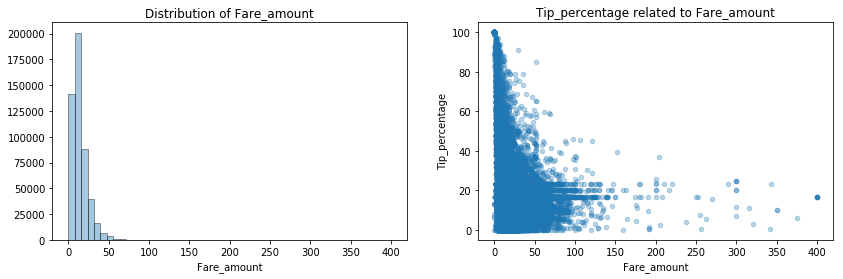

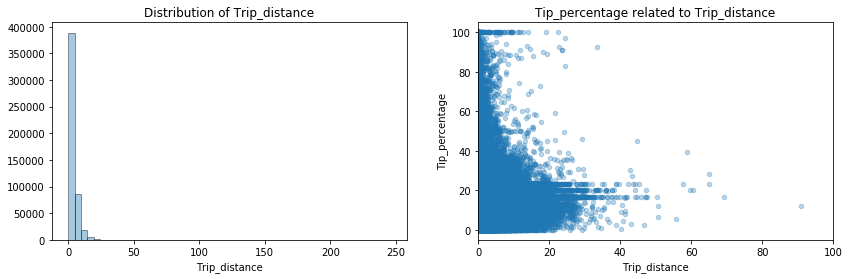

In [24]:
plot_numeric(data_tip.sample(500000), 'Fare_amount', 'Tip_percentage')
plot_numeric(data_tip.sample(500000), 'Trip_distance', 'Tip_percentage', xlim = ([0, 100]))

By analyzing the top 2 features, Fare_amount and Tip_distance, we can see that nonlinear relationship between Tip_percentage and these two features may follow log normal or power law distribution. Most of the values are centered at low fare amount and low trip distance. Moreover, the two features are acutally correlated according to previous analysis, and it is futher proved here by the two scatter plots.

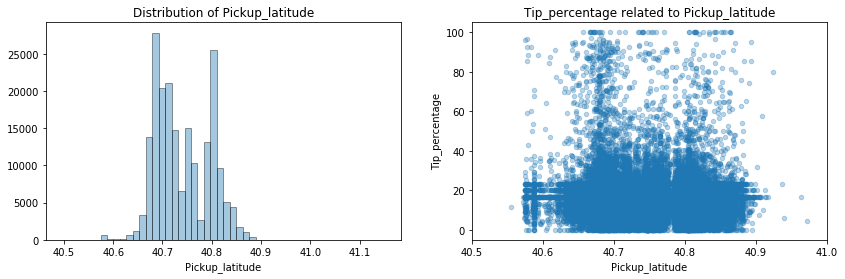

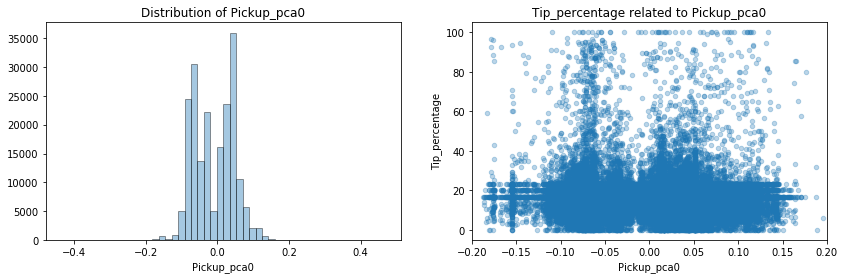

In [25]:
plot_numeric(data_tip.sample(200000, random_state = 2019), 'Pickup_latitude', 'Tip_percentage', xlim = ([40.5, 41.0]))
plot_numeric(data_tip.sample(200000, random_state = 2019), 'Pickup_pca0', 'Tip_percentage', xlim = ([-.2, .2]))

For the geospatial data, we can see that the transformed coordinates could give us more ability to do the prediction, but the differences are not too obvious as evidenced before that the Spearman coefficient for the two features is high (0.97).

Ratio of each category (%): 
 0.3    99.190869
0.0     0.809131
Name: improvement_surcharge, dtype: float64 

Ratio of each category (%): 
 19    6.724430
18    6.594172
22    6.345119
20    6.290457
21    6.235130
23    5.803649
17    5.549113
16    4.768060
9     4.740148
0     4.689307
8     4.553898
15    4.243869
10    3.881338
14    3.788961
1     3.631122
12    3.560510
11    3.559846
13    3.398850
7     2.995448
2     2.684921
3     1.922975
6     1.643849
4     1.384329
5     1.010500
Name: Pickup_hour, dtype: float64 

Ratio of each category (%): 
 1    99.993520
3     0.005649
4     0.000498
2     0.000332
Name: Payment_type, dtype: float64 



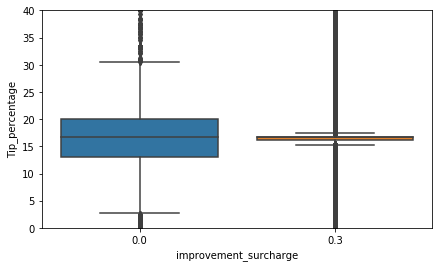

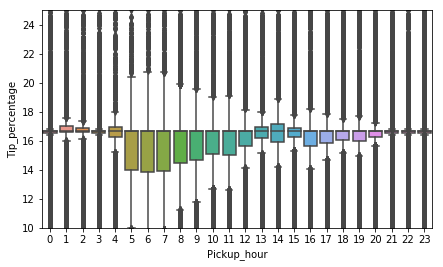

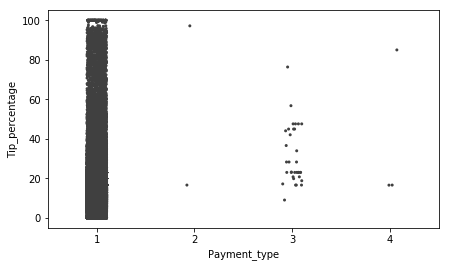

In [26]:
plot_category(data_tip, 'improvement_surcharge', 'Tip_percentage', figure_type = 'boxplot', ylim = [0, 40])
plot_category(data_tip, 'Pickup_hour', 'Tip_percentage', figure_type = 'boxplot', ylim = [10, 25])
plot_category(data_tip, 'Payment_type', 'Tip_percentage', figure_type = 'strip')

We see that although some features have low pvalues, such as improvement_surcharge and Payment_type, they are highly unbalanced (e.g. Payment_type with 99.99% being type 1, improvement_surcharge with 99.19% being 0.0) such that they can not be choosen as the features input into the machine models.

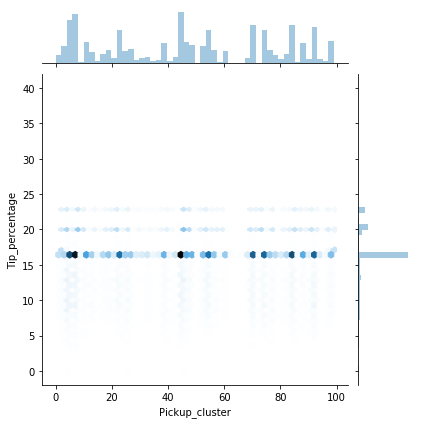

In [27]:
data_sample = data_tip[data_tip.Tip_percentage < 40].sample(500000, random_state = 2019)
_ = sns.jointplot(x = 'Pickup_cluster', y = 'Tip_percentage', kind = 'hex', data = data_sample)

The Pickup_cluster feature shows that some cluster has higher number of people giving tipps, for instance, cluster 70 and 80, which could help the predictions in the following machine modeling.

## 6. Machine Learning Models

- We first use linear regression model as the baseline
- As all the features are nonlinear in terms of the target variable, the tree-based models would be then utilized to train our models.  We will use the RandomForest and XGBoost Regressor from [scikit-learn](https://scikit-learn.org/stable/) and [XGBoost](https://xgboost.ai/).
- We will iteratively choose the features based on the EDA done in the last section, and the traing results from trees. The features may be adjusted according to the results.

We first choose ***linear regression*** as the baseline model to compare the performances of other models, and most related features based on previous analysis are selected. The results from the test dataset show that the ***RMSE and MAE are 5.70 and 3.18***, respectively. The Pickup_latitude and Dropoff_pca1 are the two featuers with high linear coefficients.

Root Mean Squared Error (RMSE): 5.70
Mean Absolute Error (MAE): 3.18


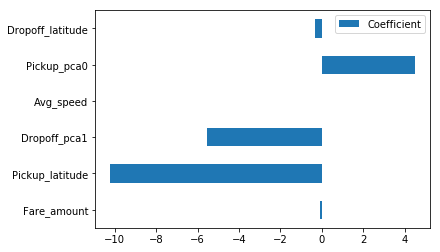

In [28]:
from sklearn.linear_model import LinearRegression
train, test = train_test_split(data_tip, test_size = 0.2, random_state = 2019)

# Select features with most correlated coefficients
feature = ['Fare_amount', 'Pickup_latitude', 'Dropoff_pca1','Avg_speed', 'Pickup_pca0', 'Dropoff_latitude']
lin_model = LinearRegression(normalize = True)
lin_model.fit(train[feature], train['Tip_percentage'])

# Plot coefficients for features
df_feat_impt = pd.DataFrame(lin_model.coef_, feature, columns=['Coefficient'])
df_feat_impt.plot.barh()

y_pre_test = lin_model.predict(test[feature])
print("Root Mean Squared Error (RMSE): {:.2f}".format(np.sqrt(mean_squared_error(test['Tip_percentage'], y_pre_test))))
print("Mean Absolute Error (MAE): {:.2f}".format(mean_absolute_error(test['Tip_percentage'], y_pre_test)))

Two other models (***RandomForestRegressor*** and ***XGBRegressor***) with default hyperparameters are then used to look at the performances since our exploratory data analysis proves that the features have nonlinear relations with the target.

RandomForest Root Mean Squared Error (RMSE): 5.25
RandomForest Mean Absolute Error (MAE): 3.51

XGBoost Root Mean Squared Error (RMSE): 5.00
XGBoost Mean Absolute Error (MAE): 3.15


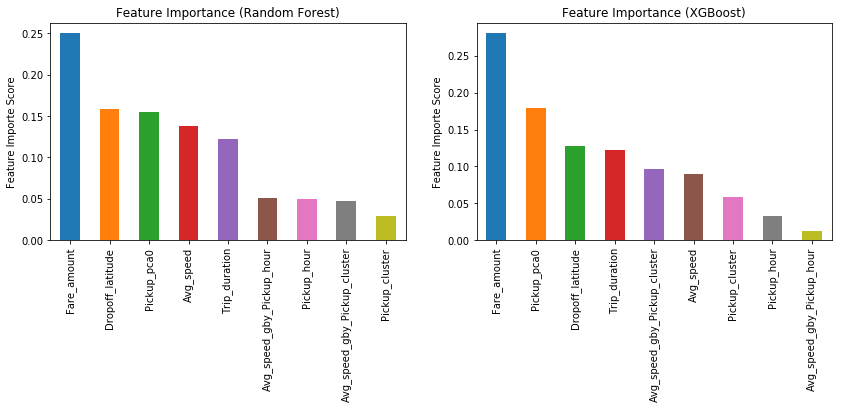

In [29]:
# Split data into train and test datasets
train, test = train_test_split(data_tip, test_size = 0.2, random_state = 2019)

# Featured selected to train the model
features = ['Fare_amount', 'Avg_speed', 'Pickup_pca0','Dropoff_latitude','Trip_duration', 'Pickup_hour',
            'Avg_speed_gby_Pickup_hour','Avg_speed_gby_Pickup_cluster', 'Pickup_cluster']

# build RandomForestRegressor model
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (14,4))
random_model = RandomForestRegressor()
random_model.fit(train[features], train['Tip_percentage'])
ypred = random_model.predict(test[features])
print("RandomForest Root Mean Squared Error (RMSE): {:.2f}"\
      .format(np.sqrt(mean_squared_error(test['Tip_percentage'], ypred))))
print("RandomForest Mean Absolute Error (MAE): {:.2f}\n".format(mean_absolute_error(test['Tip_percentage'], ypred)))

feat_imp = pd.Series(random_model.feature_importances_, features).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', ax = ax0)
_ = ax0.set_ylabel('Feature Importe Score')
_ = ax0.set_title("Feature Importance (Random Forest)")

# Build XGBRegressor model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(train[features], train['Tip_percentage'])
ypred = xgb_model.predict(test[features])
print("XGBoost Root Mean Squared Error (RMSE): {:.2f}".format(np.sqrt(mean_squared_error(test['Tip_percentage'], ypred))))
print("XGBoost Mean Absolute Error (MAE): {:.2f}".format(mean_absolute_error(test['Tip_percentage'], ypred)))

feat_imp = pd.Series(xgb_model.feature_importances_, features).sort_values(ascending=False)
feat_imp.plot(kind='bar',title='Feature Importances', ax = ax1)
_ = ax1.set_ylabel('Feature Importe Score')
_ = ax1.set_title("Feature Importance (XGBoost)")

The results show that tree-based models have better performance than the linear regression model. 
- Fare_amount and Dropoff_latitude are the top 2 features for the RandomForestRegressor model. The RMSE and MAE are ***5.25*** and  ***3.51***, respectively.
- The XGBRegressor used the Fare_amount and Pickup_pca0 most frequently to predict the target variable. The RMSE and MAE are ***5.00*** and ***3.15***, respectively.

***Hyperparameter Tuning: ***

Since we only used the RandomForestRegressor and XGBRegressor with default hyperparameters and without ***Cross Validation*** to the models, their performances could be improved by carefully tuning their hyperparameters and simultaneously the cross validation strategy can be used to choose the hyperparameters.

- With the time and computation power constraint, the RandomizedSearchCV technique is preferred in this project to choose the hyperparamters. 
- The most influential hyperparameters are picked as the candidates input into the RandomizedSearchCV, which could save us a large amount of time to obtain desired results.
- Limited parameter settings (10 settings) are used due to time and computational power contraint. If more time is allowed, more hyperparameter settings could be tried.

In [30]:
# Utility function to report best scores
def report(results, n_top=3):
    """ Report the top 3 hyperparameter settings
    Args:
        results: cv_results attribut of RamdomizedSearchCV
        n_top(int): display the n_top parameter settings
    Return:
        Display the n_top results"""
    
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# Plot the feature importance
def plot_feature_importance(model, features):
    """Plot feature importance
    Args:
       model: tree-based model
       features: features used to train the model
    Return:
       Plot the feature importance"""
    
    fig, ax = plt.subplots(1, 1, figsize = (9, 4))
    feat_imp = pd.Series(model.feature_importances_, features).sort_values(ascending=False)
    feat_imp.plot(kind='bar',title='Feature Importances', ax = ax)
    _ = ax1.set_ylabel('Feature Importe Score')
    _ = ax1.set_title("Feature Importance")
        
train, test = train_test_split(data_tip.sample(150000), random_state = 2018)

RandomForestRegressor Hyperparameter Tuning ...
RandomizedSearchCV took 200.69 seconds for 10 parameter settings for RandomForestRegressor.

Model with rank: 1
Mean validation score: -24.731 (std: 0.637)
Parameters: {'max_depth': 10, 'max_features': 7, 'n_estimators': 100}

Model with rank: 2
Mean validation score: -24.771 (std: 0.627)
Parameters: {'max_depth': 5, 'max_features': 5, 'n_estimators': 60}

Model with rank: 3
Mean validation score: -24.787 (std: 0.705)
Parameters: {'max_depth': 15, 'max_features': 4, 'n_estimators': 60}

RandomForest Root Mean Squared Error (RMSE): 4.97
RandomForest Mean Absolute Error (MAE): 3.14



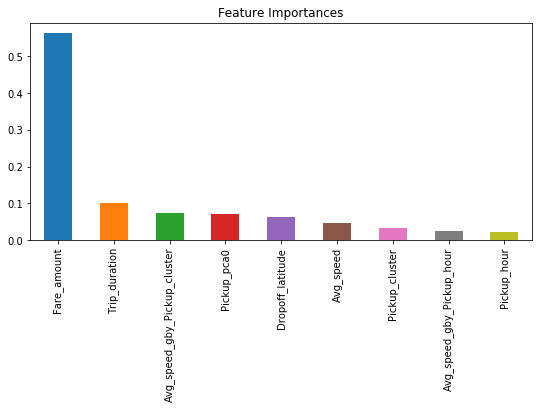

In [31]:
from scipy.stats import randint

# RandomForestRegressor
print("RandomForestRegressor Hyperparameter Tuning ...")
Forest_model = RandomForestRegressor()
#define hyperparameters
param_dist = {"n_estimators": range(20, 141, 20),
             "max_depth": [5, 10, 15, 20, None],
             "max_features": randint(3, len(features))}
n_iter_search = 10
Forest_search = RandomizedSearchCV(Forest_model, param_distributions = param_dist, n_iter = n_iter_search,
                                   scoring = 'neg_mean_squared_error', n_jobs = -1, cv = 5)

start = time.time()
Forest_search.fit(train[features], train['Tip_percentage'])
print("RandomizedSearchCV took {:.2f} seconds for {:d} parameter settings for RandomForestRegressor.\n"\
      .format((time.time() - start), n_iter_search))
report(Forest_search.cv_results_)

ypred = Forest_search.best_estimator_.predict(test[features])

# Save trained model
with open('RandomForest_Regressor.pkl', 'wb') as f:
    pickle.dump(Forest_search.best_estimator_, f)
    
print("RandomForest Root Mean Squared Error (RMSE): {:.2f}"\
      .format(np.sqrt(mean_squared_error(test['Tip_percentage'], ypred))))
print("RandomForest Mean Absolute Error (MAE): {:.2f}\n".format(mean_absolute_error(test['Tip_percentage'], ypred)))
plot_feature_importance(Forest_search.best_estimator_, features)

- The results show that after 10 random hyperparameter settings, the best performance for the RandomForestRegressor is ***4.97 for RMSE and 3.14 for MAE.***
- The best hyperparameters among the 10 settings are max_depth:15, max_feature:7, n_estimators:100.
- The best model chose Fare_amount as the most important feature that also has absolute priority compared to other features

XGBRegressor Hyperparameter Tuning ...
RandomizedSearchCV took 108.29 seconds for 10 parameter settings for XGBRegressor.

Model with rank: 1
Mean validation score: -24.846 (std: 0.685)
Parameters: {'subsample': 0.9, 'reg_lambda': 2.0, 'min_child_weight': 75, 'max_depth': 6, 'learning_rate': 0.15, 'colsample_bytree': 0.7}

Model with rank: 2
Mean validation score: -24.889 (std: 0.809)
Parameters: {'subsample': 0.6, 'reg_lambda': 3.0, 'min_child_weight': 10, 'max_depth': 6, 'learning_rate': 0.15, 'colsample_bytree': 0.8}

Model with rank: 3
Mean validation score: -24.949 (std: 0.653)
Parameters: {'subsample': 0.7, 'reg_lambda': 2.0, 'min_child_weight': 50, 'max_depth': 8, 'learning_rate': 0.15, 'colsample_bytree': 0.7}

XGBoost Root Mean Squared Error (RMSE): 5.00
XGBoost Mean Absolute Error (MAE): 3.15


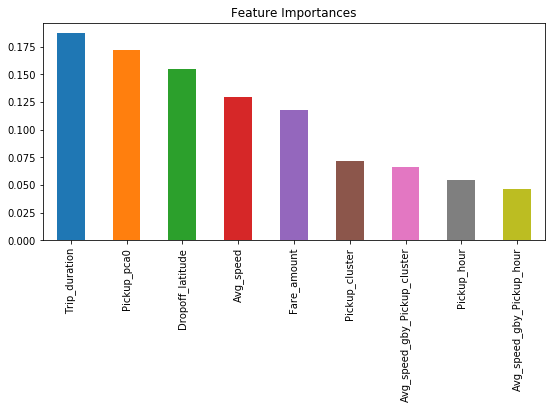

In [32]:
# XGBoost Regressor
print("XGBRegressor Hyperparameter Tuning ...")
xgboost_model = xgb.XGBRegressor()
# Set up the potential hyperparameters
param_xgb = {'min_child_weight': [10, 20, 50, 75, 100],
         'learning_rate': [0.05, 0.1, 0.15],
         'max_depth': [6, 8, 10, 12, 15],
         'colsample_bytree': [0.5, 0.7, 0.8],
         'subsample': [0.6, 0.7, 0.8, 0.9],
         'reg_lambda': [0.5, 1., 1.5, 2., 3.]}

n_iter_search = 10
XGB_search = RandomizedSearchCV(xgboost_model, param_distributions = param_xgb, n_iter = n_iter_search,
                                scoring = 'neg_mean_squared_error', n_jobs = -1, cv = 5)

start = time.time()
XGB_search.fit(train[features], train['Tip_percentage'])
print("RandomizedSearchCV took {:.2f} seconds for {:d} parameter settings for XGBRegressor.\n"\
      .format((time.time() - start), n_iter_search))
report(XGB_search.cv_results_)

ypred = XGB_search.best_estimator_.predict(test[features])

# Save trained model
with open('XGBoost_Regressor.pkl', 'wb') as f:
    pickle.dump(XGB_search.best_estimator_, f)
    
print("XGBoost Root Mean Squared Error (RMSE): {:.2f}".format(np.sqrt(mean_squared_error(test['Tip_percentage'], ypred))))
print("XGBoost Mean Absolute Error (MAE): {:.2f}".format(mean_absolute_error(test['Tip_percentage'], ypred)))
plot_feature_importance(XGB_search.best_estimator_, features)

- The results show that after 10 random hyperparameter settings, the best performance for the XGBRegressor is ***5.00 for RMSE and 3.15 for MAE.***
- The best hyperparameters among the 10 settings are subsampe:0.9, reg_lambda:2.0, min_child_weight:75, max_depth:6, learning_rate:0.15, colsample_bytree:0.7.
- The top three features are Trip duration, Pickup_pca0 and Dropoff_latitude and they are almost equally important for the model.
- We can notice that the choosing strategy for this two tree-based models are different in terms of different picked features.

***Question 5(A): We will further put further efforts on the average speed and its relations with other variables.***

The distribution of average speed also shows certain skewness and log normality under the hypothesis that most cabs drive with speed around 10mph considering the traffic conditions in NYC. Some high speeds exist mainly because of some long distance trips, for instance, to airports.

Text(0.5,1,'Distribution of Average Speed')

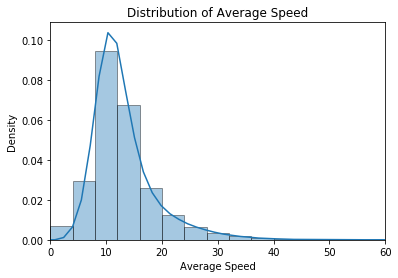

In [33]:
data_explore = data.copy()
ax = sns.distplot(data_explore.Avg_speed, hist_kws = {'edgecolor': 'black'})
ax.set_xlabel('Average Speed')
ax.set_ylabel("Density")
ax.set_xlim([0, 60])
ax.set_title("Distribution of Average Speed")

For investigating the average speeds for each week and discerning the differences, the boxplot is drawn. We also plot the kernel density estimation for each week to identify their distributions. We can observe that the distributions of average speeeds for each week are right skewed and not followed with the normal distribution. From the boxplot, it is hard to tell the big differences among weeks, but week 2 and week 3 have very close shapes.

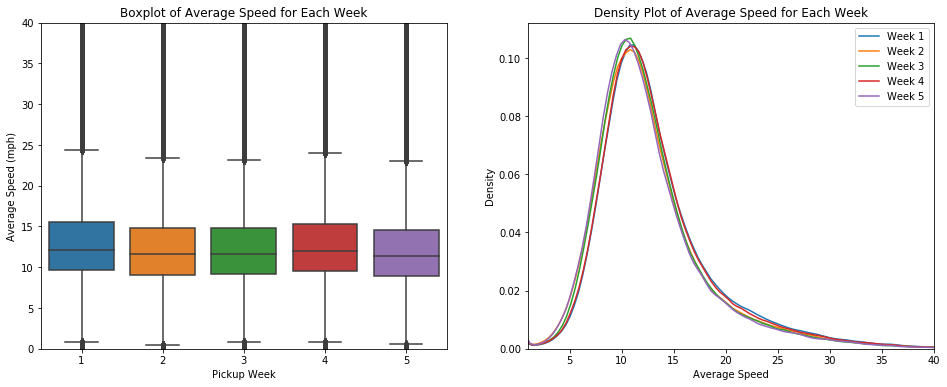

In [34]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (16,6))
sns.boxplot(x = 'Pickup_week', y = 'Avg_speed', data = data_explore, ax = ax0)
ax0.set_ylim([0, 40])
ax0.set_xlabel("Pickup Week")
ax0.set_ylabel("Average Speed (mph)")
ax0.set_title("Boxplot of Average Speed for Each Week")

for label, df in data_explore.groupby('Pickup_week'):
    _ = sns.kdeplot(df[df.Avg_speed < 50]['Avg_speed'], ax = ax1)
ax1.set_xlim([1,40])
lines = ax1.get_legend_handles_labels()[0]
labels = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5']
ax1.legend(lines, labels, loc = 'best')
ax1.set_xlabel("Average Speed")
ax1.set_ylabel("Density")
_ = ax1.set_title('Density Plot of Average Speed for Each Week')

- Even though the distributions of the average speeds are not strictly normal distributions, the enough amount of data can guarantee the usage of the statistical testing. We first apply the ANOVA testing to our average speed groupby week which can give us the information to judge the mean similarity among groups. The pvalue for the ANOVA testing is lower than significance leve (0.05) so that we reject the null hypothesis and say population mean of average speed group are significantly not the same. 
- To pinpoint the group relations, we use the t-test pair-wisely revealing that the pvalue for week 2 and week 3 pair is bigger than significance level (0.05) to fail the rejection of null hypothesis. Thus, we do not have enough evidence showing week 2 and week 3 are significantly different.

In [35]:
# Perform ANOVA test
print("Average Speed for Each Week: \n", data_explore.groupby('Pickup_week')['Avg_speed'].mean(), "\n")
print("One-way ANOVA test:")
anova, _ = statistic_test(data_explore, ['Pickup_week'], 'Tip_percentage')
print(anova)

# Perform T-test pair-wisely
print("\n T-test:")
weeks = data_explore.Pickup_week.unique()
pvals = []
for i in range(len(weeks)):
    for j in range(len(weeks)):
        pvals.append((weeks[i], weeks[j], stats.ttest_ind(data_explore[data_explore.Pickup_week == weeks[i]].Avg_speed,\
                    data_explore[data_explore.Pickup_week == weeks[j]].Avg_speed)[1]))
ttest = pd.DataFrame(pvals, columns = ['wa', 'wb', 'pvalue'])\
        .pivot_table(index = 'wa', columns = 'wb', values = 'pvalue')
print(ttest)

Average Speed for Each Week: 
 Pickup_week
1    13.342042
2    12.667384
3    12.674039
4    13.147603
5    12.479533
Name: Avg_speed, dtype: float64 

One-way ANOVA test:
       feature           pval
0  Pickup_week  5.258131e-185

 T-test:
wb             1              2              3              4              5
wa                                                                          
1   1.000000e+00   0.000000e+00   0.000000e+00   1.614178e-30   0.000000e+00
2   0.000000e+00   1.000000e+00   6.648826e-01  2.317418e-202   3.621753e-19
3   0.000000e+00   6.648826e-01   1.000000e+00  3.523248e-196   1.956821e-20
4   1.614178e-30  2.317418e-202  3.523248e-196   1.000000e+00  6.885046e-210
5   0.000000e+00   3.621753e-19   1.956821e-20  6.885046e-210   1.000000e+00


- We perform the One-way ANOVA test for average speed grouped by pickup hour. The pvalue is smaller than the significance level (0.05) to reject the null hypothesis. Thus, we can say that the average speeds for each hour are not significantely same.
- The pointplot shows that peak value of the average speed appears at 5:00am and lowest point at 5:00pm, which makes sense because at 5:00am in the morning,the traffic condition is good, whereas the traffic is usually awful at afternoon, especially around 5:00pm.

Average Speed for Each Hour: 
 Pickup_hour
0     14.603961
1     14.879677
2     15.034151
3     15.414078
4     16.273159
5     18.034912
6     17.004789
7     13.517504
8     12.324181
9     12.606169
10    12.553736
11    12.259709
12    12.147063
13    12.058170
14    11.566121
15    11.202866
16    10.971220
17    10.942039
18    11.511885
19    12.073764
20    12.758480
21    13.617917
22    14.080904
23    14.367703
Name: Avg_speed, dtype: float64 

One-way ANOVA test:
       feature           pval
0  Pickup_week  5.258131e-185


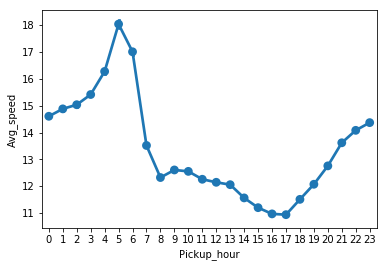

In [36]:
# plot average speed for each hour and its confidence interval
_ = sns.pointplot(x = 'Pickup_hour', y = 'Avg_speed', data = data)

# Perform ANOVA test
print("Average Speed for Each Hour: \n", data_explore.groupby('Pickup_hour')['Avg_speed'].mean(), "\n")
print("One-way ANOVA test:")
anova, _ = statistic_test(data_explore, ['Pickup_week'], 'Tip_percentage')
print(anova)